In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info

<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

In [4]:
df.drop(["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"], axis = 1, inplace = True)

df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [5]:
X = df[["MedInc", "Latitude", "Longitude"]]
X.head()

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [6]:
model_unsup = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model_unsup.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [7]:
y_train = list(model_unsup.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


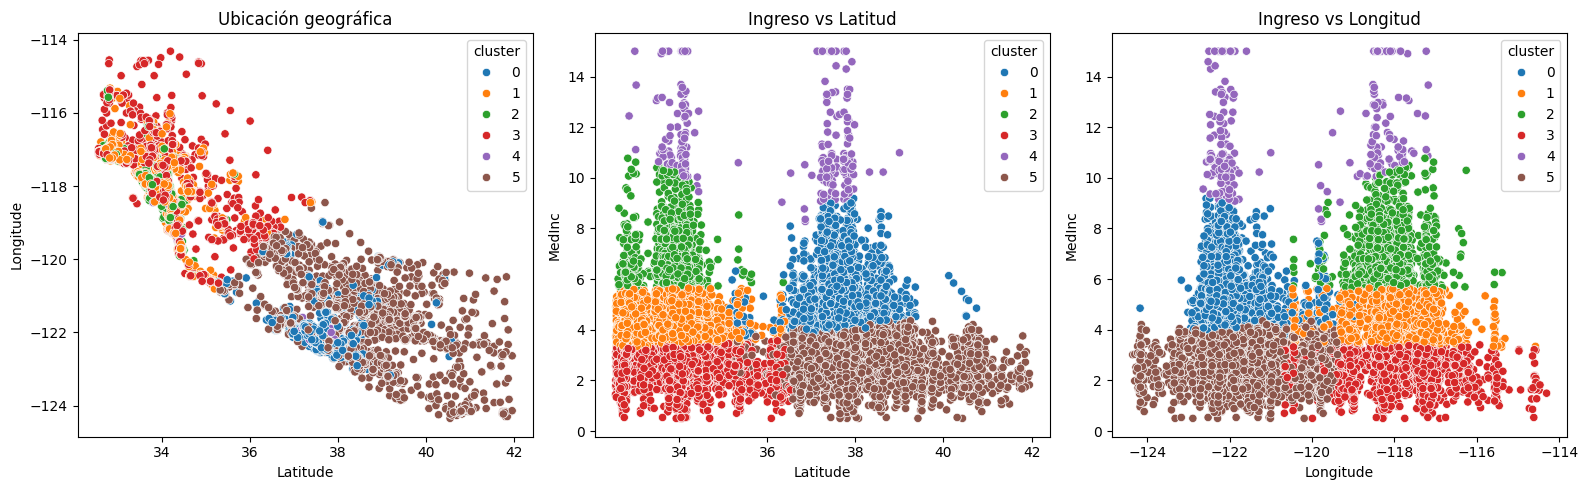

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

sns.scatterplot(data=X_train, x="Latitude", y="Longitude", hue="cluster", palette="tab10", ax=axes[0])
axes[0].set_title("Ubicación geográfica")

sns.scatterplot(data=X_train, x="Latitude", y="MedInc", hue="cluster", palette="tab10", ax=axes[1])
axes[1].set_title("Ingreso vs Latitud")

sns.scatterplot(data=X_train, x="Longitude", y="MedInc", hue="cluster", palette="tab10", ax=axes[2])
axes[2].set_title("Ingreso vs Longitud")

plt.tight_layout()
plt.show()

In [9]:
y_test = list(model_unsup.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


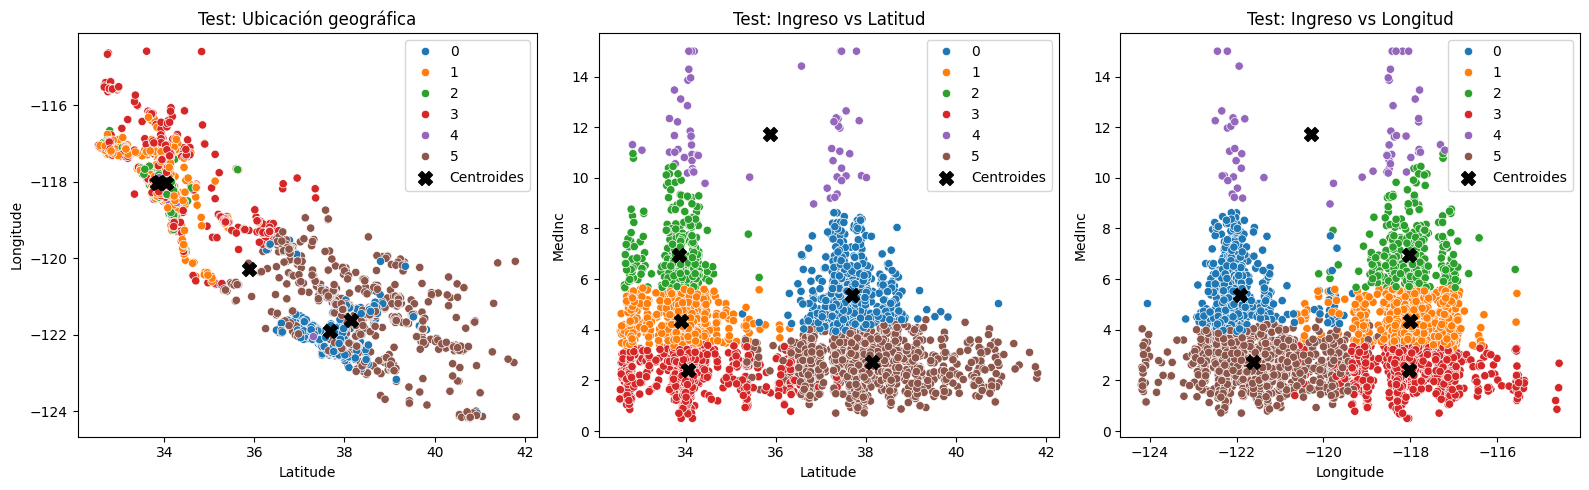

In [11]:
centroids = model_unsup.cluster_centers_

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(data=X_test, x="Latitude", y="Longitude", hue="cluster", palette="tab10", ax=axes[0])
axes[0].scatter(centroids[:, 1], centroids[:, 2], c='black', marker='X', s=100, label='Centroides')
axes[0].set_title("Test: Ubicación geográfica")
axes[0].legend()

sns.scatterplot(data=X_test, x="Latitude", y="MedInc", hue="cluster", palette="tab10", ax=axes[1])
axes[1].scatter(centroids[:, 1], centroids[:, 0], c='black', marker='X', s=100, label='Centroides')
axes[1].set_title("Test: Ingreso vs Latitud")
axes[1].legend()

sns.scatterplot(data=X_test, x="Longitude", y="MedInc", hue="cluster", palette="tab10", ax=axes[2])
axes[2].scatter(centroids[:, 2], centroids[:, 0], c='black', marker='X', s=100, label='Centroides')
axes[2].set_title("Test: Ingreso vs Longitud")
axes[2].legend()

plt.tight_layout()
plt.show()

In [12]:
model_sup = DecisionTreeClassifier(random_state = 42)
model_sup.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

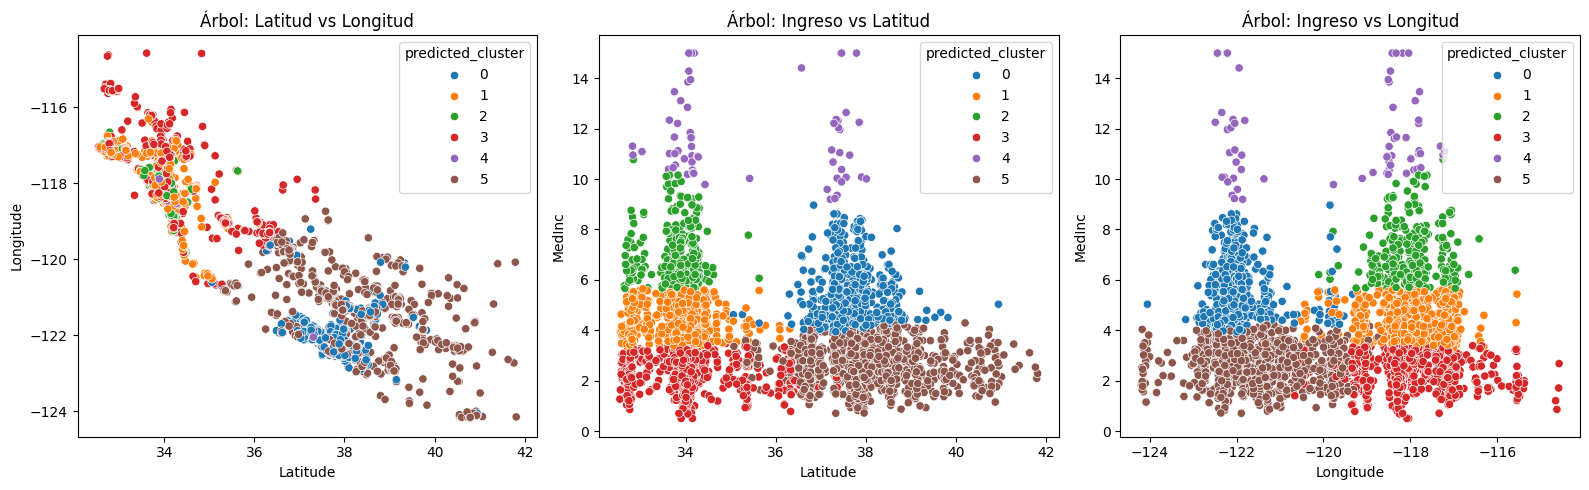

In [13]:
model_sup = DecisionTreeClassifier(random_state=42)
model_sup.fit(X_train[["MedInc", "Latitude", "Longitude"]], y_train)

# Predecir sobre X_test
y_pred = model_sup.predict(X_test[["MedInc", "Latitude", "Longitude"]])
X_test["predicted_cluster"] = y_pred

# Graficar resultados
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(data=X_test, x="Latitude", y="Longitude", hue="predicted_cluster", palette="tab10", ax=axes[0])
axes[0].set_title("Árbol: Latitud vs Longitud")

sns.scatterplot(data=X_test, x="Latitude", y="MedInc", hue="predicted_cluster", palette="tab10", ax=axes[1])
axes[1].set_title("Árbol: Ingreso vs Latitud")

sns.scatterplot(data=X_test, x="Longitude", y="MedInc", hue="predicted_cluster", palette="tab10", ax=axes[2])
axes[2].set_title("Árbol: Ingreso vs Longitud")

plt.tight_layout()
plt.show()

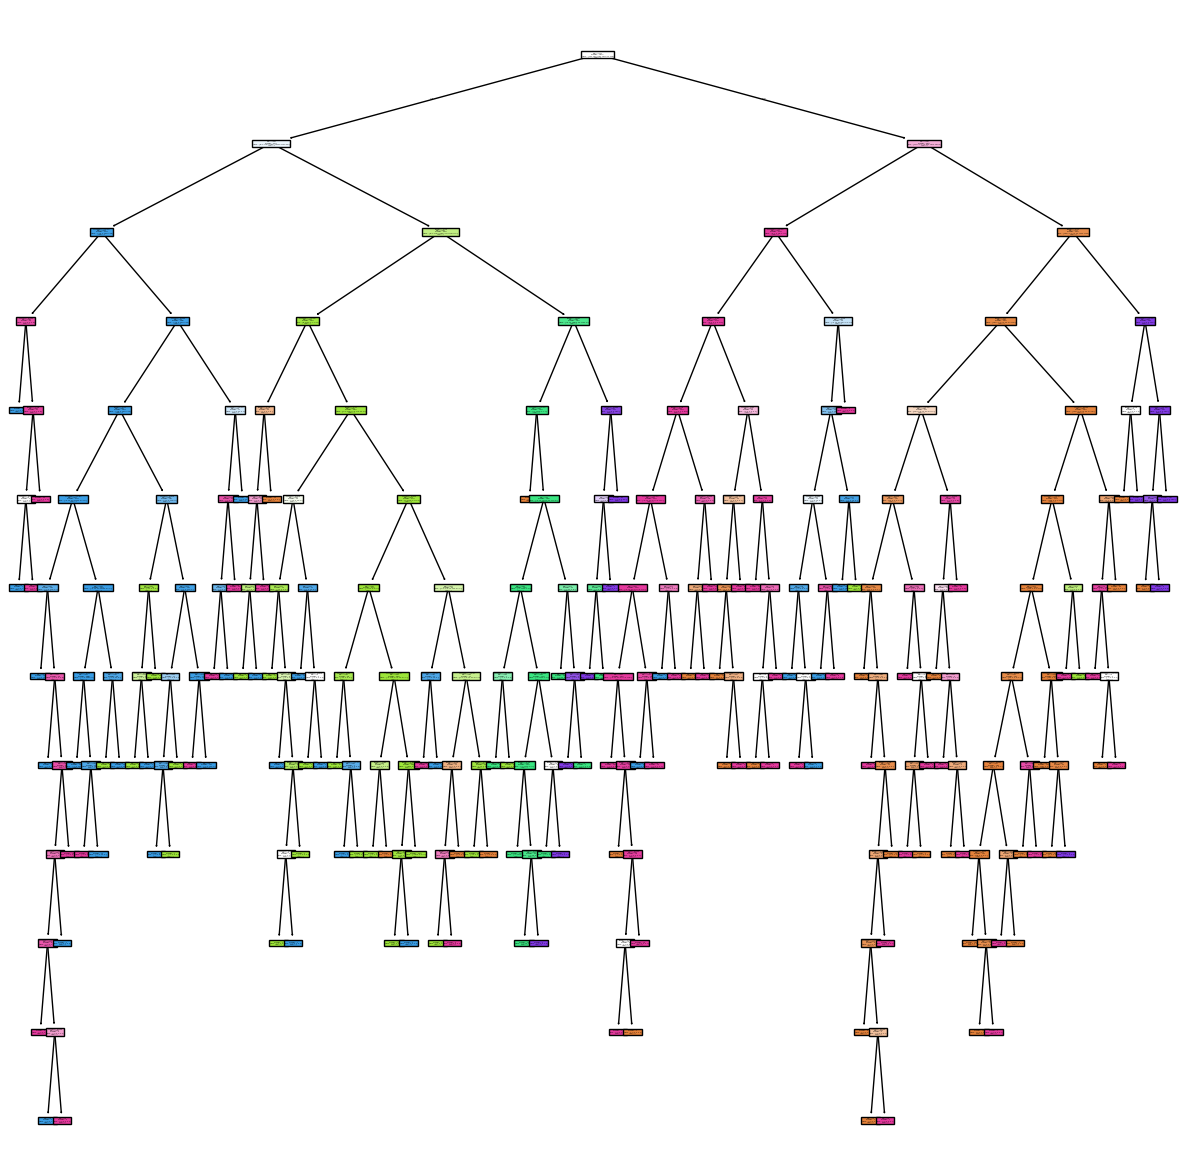

In [19]:

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()


In [17]:
y_pred = model_sup.predict(X_test[["MedInc", "Latitude", "Longitude"]])
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [20]:
accuracy_score(y_test, y_pred)


0.9951550387596899